In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [2]:
import numpy as np 
import pandas as pd

In [3]:
Data =pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")
Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [4]:
Data.drop('RowNumber' , axis = 1 , inplace = True)
Data.drop('CustomerId' , axis = 1 , inplace = True)
Data.drop('Surname' , axis = 1 , inplace = True)

In [5]:
Data.isnull().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10002 non-null  int64  
 1   Geography        10001 non-null  object 
 2   Gender           10002 non-null  object 
 3   Age              10001 non-null  float64
 4   Tenure           10002 non-null  int64  
 5   Balance          10002 non-null  float64
 6   NumOfProducts    10002 non-null  int64  
 7   HasCrCard        10001 non-null  float64
 8   IsActiveMember   10001 non-null  float64
 9   EstimatedSalary  10002 non-null  float64
 10  Exited           10002 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 859.7+ KB


In [7]:
Data = Data.dropna()

In [8]:
Data['Gender'].value_counts()

Gender
Male      5455
Female    4543
Name: count, dtype: int64

In [9]:
Data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,650.529606,38.920287,5.013003,76481.490819,1.530206,0.705541,0.514803,100099.786455,0.203841
std,96.633003,10.487986,2.892152,62393.187035,0.581669,0.455822,0.499806,57510.939962,0.402872
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,652.000000,37.000000,5.000000,97173.290000,1.000000,1.000000,1.000000,100218.210000,0.000000
75%,718.000000,44.000000,7.000000,127641.417500,2.000000,1.000000,1.000000,149395.882500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Geography', ylabel='count'>

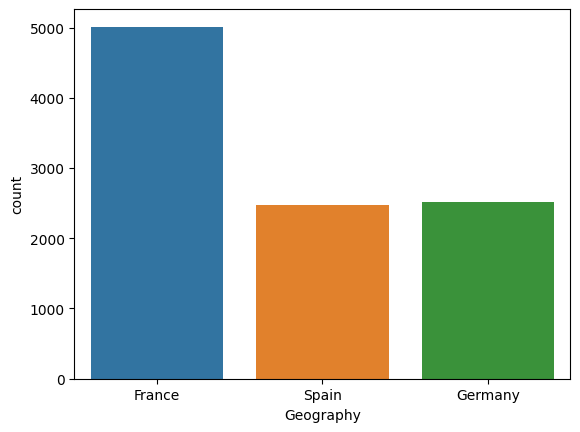

In [11]:
sns.countplot( data = Data , x = 'Geography' )

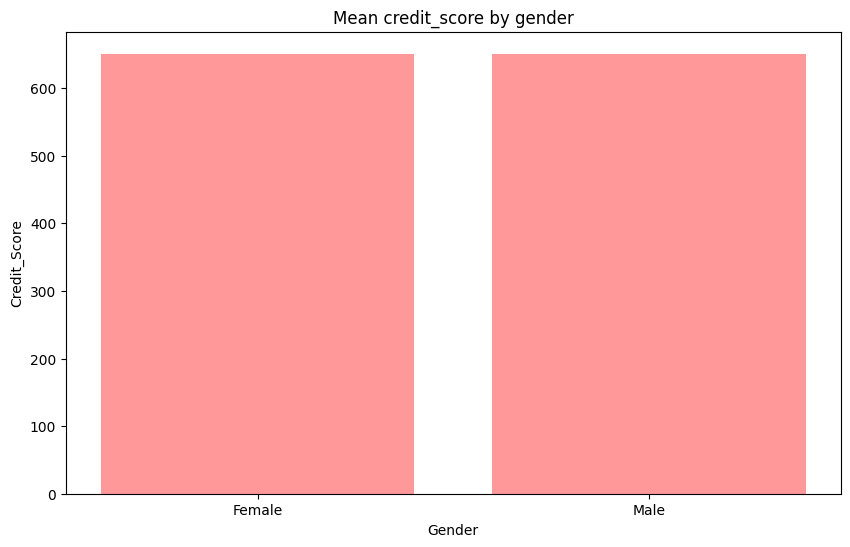

In [12]:
grouped_data = Data.groupby('Gender')['CreditScore'].mean().reset_index()

plt.figure(figsize=(10, 6))

plt.bar( x = grouped_data['Gender'] , height =grouped_data['CreditScore'] , color = '#ff9999' )

plt.xlabel('Gender')
plt.ylabel('Credit_Score')
plt.title('Mean credit_score by gender')

plt.show()

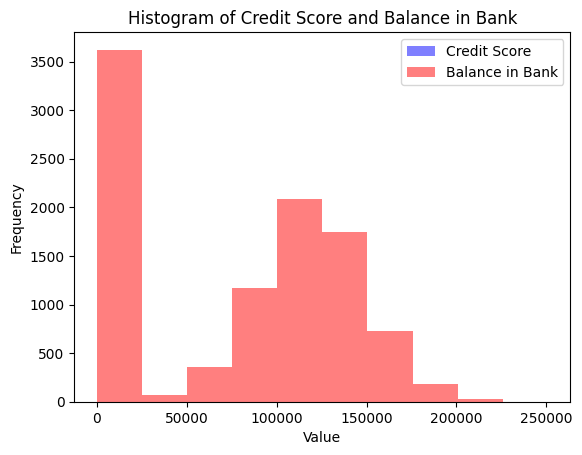

In [13]:
plt.hist(Data['CreditScore'], bins=10, alpha=0.5, color='blue', label='Credit Score')
plt.hist(Data['Balance'], bins=10, alpha=0.5, color='red', label='Balance in Bank')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Credit Score and Balance in Bank')

plt.legend(loc='upper right')

plt.show()

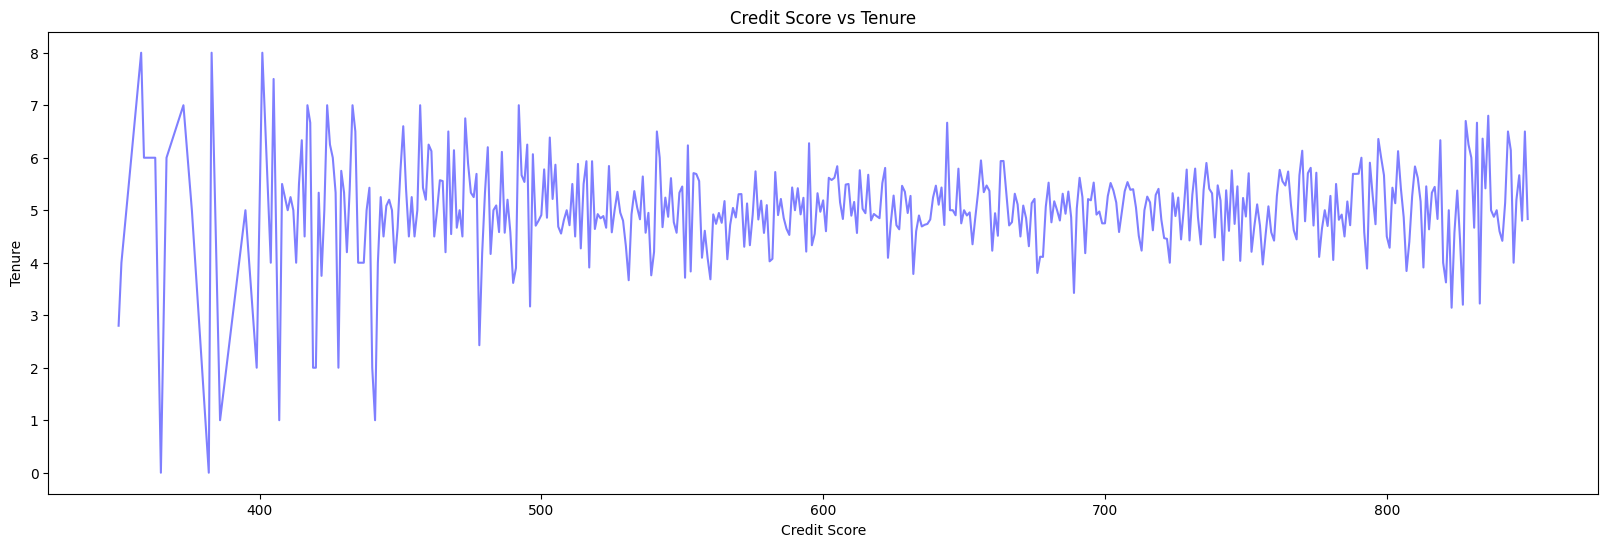

In [14]:
grouped_data = Data.groupby('CreditScore')['Tenure'].mean().reset_index()
plt.figure(figsize=(20, 6))

plt.plot(grouped_data['CreditScore'], grouped_data['Tenure'], color='blue', alpha=0.5)

plt.xlabel('Credit Score')
plt.ylabel('Tenure')
plt.title('Credit Score vs Tenure')


plt.show()

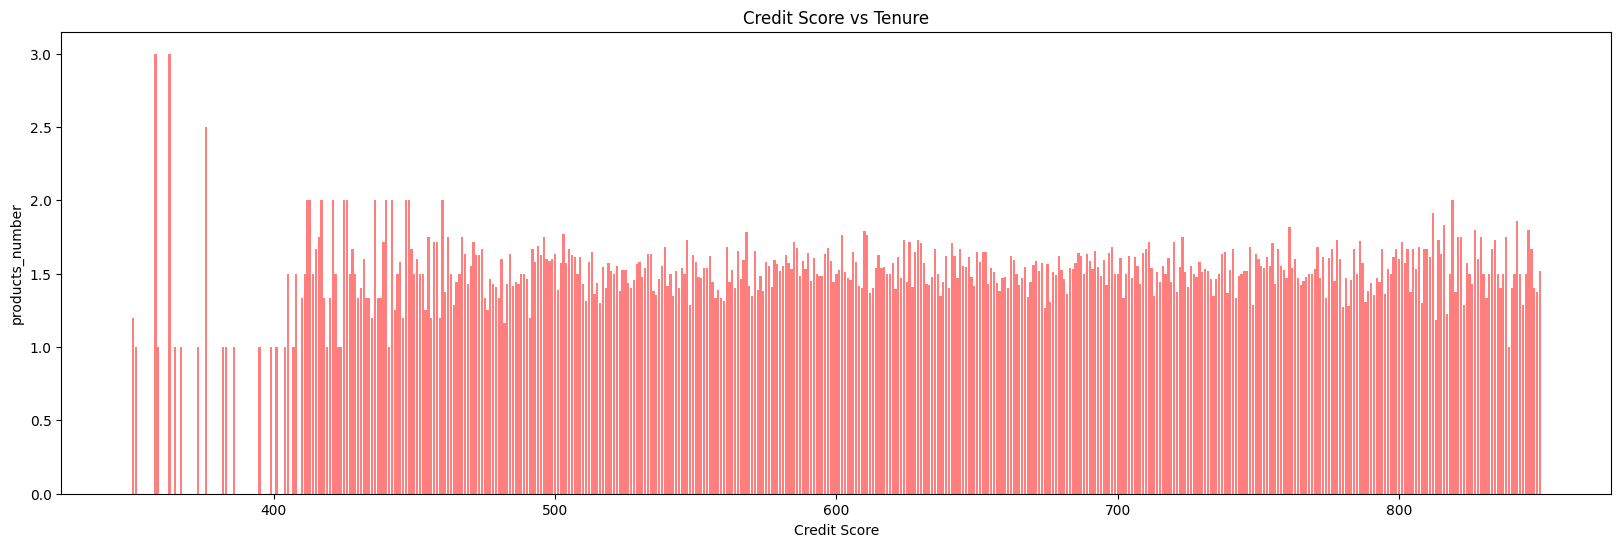

In [15]:
grouped_data = Data.groupby('CreditScore')['NumOfProducts'].mean().reset_index()
plt.figure(figsize=(20, 6))

plt.bar( grouped_data['CreditScore'],grouped_data['NumOfProducts'] , color='red', alpha=0.5)

plt.xlabel('Credit Score')
plt.ylabel('products_number')
plt.title('Credit Score vs Tenure')


plt.show()

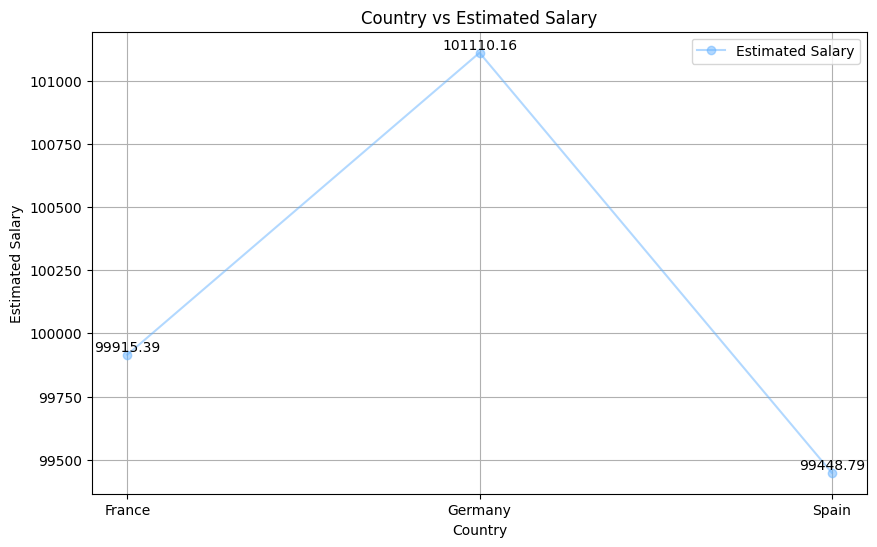

In [16]:
grouped_data = Data.groupby('Geography')['EstimatedSalary'].mean().reset_index()
plt.figure(figsize=(10, 6))

# Plot the line
plt.plot(grouped_data['Geography'], grouped_data['EstimatedSalary'], color='#66b3ff', alpha=0.5, marker='o', label='Estimated Salary')

# Add data points with values
for i, row in grouped_data.iterrows():
    plt.text(row['Geography'], row['EstimatedSalary'], f'{row["EstimatedSalary"]:.2f}', ha='center', va='bottom')

plt.xlabel('Country')
plt.ylabel('Estimated Salary')
plt.title('Country vs Estimated Salary')
plt.legend()
plt.grid(True)

plt.show()

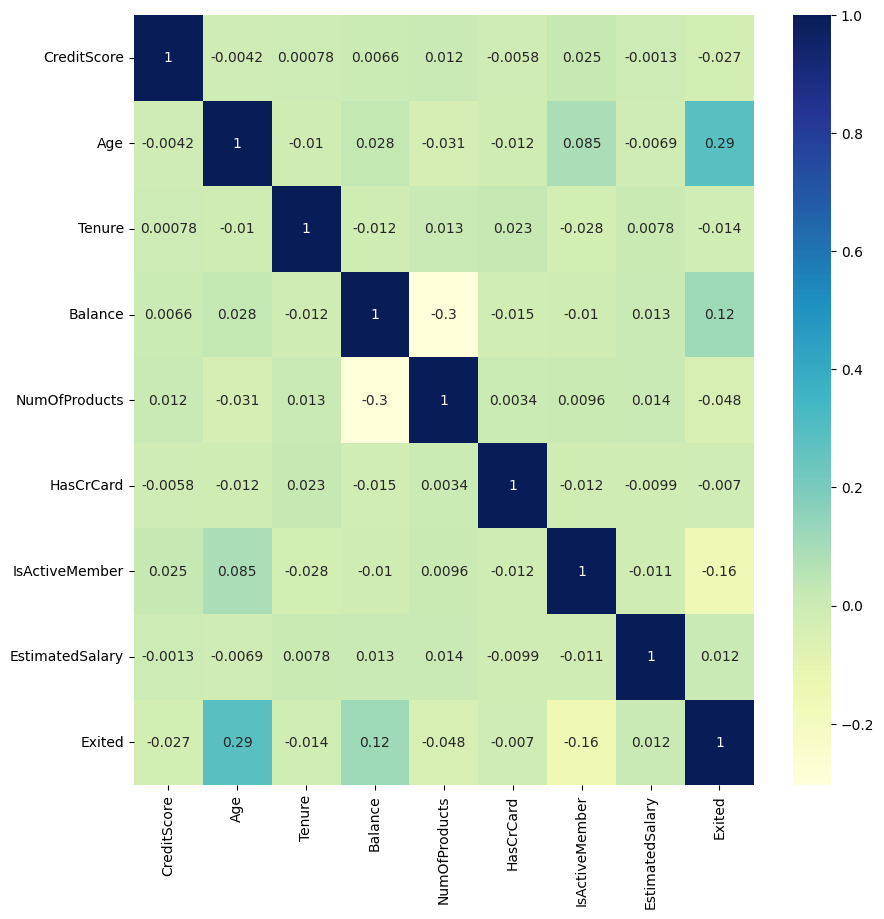

In [17]:
column_droped = [ 'Gender' , 'Geography']
data = Data.drop( columns = column_droped , axis = 1 , inplace = False )
plt.figure(figsize=(10, 10))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

drop_column = [ 'Exited' , 'Geography' , 'Gender']
X = Data.drop(columns = drop_column , axis = 1 )
y = Data['Exited']

X_train, X_test, y_train, y_test = train_test_split( X , y , test_size = 0.2 , random_state = 16 )

In [19]:
Weight = np.random.randn(X_train.shape[1])*0.0001
bias = 0
Weight.shape

(8,)

In [20]:
def sigmoid_function(X):
    return 1/(1 + np.exp(-X))

print ("sigmoid(0) = " + str(sigmoid_function(0)))

sigmoid(0) = 0.5


In [21]:
def compute_cost(X,y,W,b):
    m=X.shape[0]
    cost =0.0
    for i in range(m):
        yhat = sigmoid_function(np.dot(X.iloc[i] , W) + b)
        cost += - (y.iloc[i]*np.log(yhat) - (1 - y.iloc[i])*(np.log(1 - yhat)))
    cost = cost/m
    return cost

In [22]:
cost = compute_cost(X_train,y_train,Weight, bias)

In [23]:
cost

-2.6257810180685968

In [24]:
def compute_gradient(X,y,W,b):
    
    m=X.shape[0]
    n=X.shape[1]
    dj_dW = np.zeros(W.shape)
    dj_db = 0
    for i in range(m):
        loss = sigmoid_function(np.dot(X.iloc[i],W)) - y.iloc[i]
        for j in range(n):
            dj_dW[j] +=  loss * X.iloc[i,j]
        dj_db += loss 
    dj_dW /= m
    dj_db /= m
    dj_dW = np.array(dj_dW)
    return dj_dW, dj_db


In [25]:
dj_dW ,dj_db = compute_gradient(X_train,y_train,Weight,bias)

In [26]:
print("Updated Weight: ",dj_dW)
print("Updated Bias: ",dj_db)

Updated Weight:  [3.06078643e+02 1.69186021e+01 2.38029131e+00 1.86686656e+04
 7.70153787e-01 3.32291165e-01 2.73191253e-01 6.17285139e+04]
Updated Bias:  0.46841951653326175


In [27]:
import math

In [28]:
def gradient_descent(X,y,W,b,compute_gradient,compute_cost,alpha,num_iteration):
    m=X.shape[0]
    Weight = np.zeros(X.shape[1])
    bias = 0
    J_history=[]
    
    for i in range(num_iteration):
        
        dj_dW , dj_db = compute_gradient(X,y,W,b)
        
        Weight = Weight - alpha * dj_dW
        bias = bias - alpha * dj_db
        
        if i<100000:
            cost = compute_cost(X,y,W,b)
            J_history.append(cost)
        
        if i% math.ceil(num_iteration / 10) == 0 or i == (num_iteration-1):
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.8f}   ")  
    return Weight , bias , J_history         